# Рекомендация тарифов

**Описание проекта:**
Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».
В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.
Постройте модель с максимально большим значением accuracy. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте accuracy на тестовой выборке самостоятельно.


**Описание данных**

Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:
* *сalls* — количество звонков,
* *minutes* — суммарная длительность звонков в минутах,
* *messages* — количество sms-сообщений,
* *mb_used* — израсходованный интернет-трафик в Мб,
* *is_ultra* — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).



**Цель проекта:** построить модель для задачи классификации, которая предложит пользователям подходящий новый («Смарт» или «Ультра»).


**Этапы работы:**
* загрузка и обзор данных;
* разделение исходных данных на выборки (обучающую, валидационную и тестовую);
* исследование качества разных моделей и выбор наилучшей;
* проверка качества модели на тестовой выборке;
* проверка моделей на вменяемость.

## Откроем файл с данными и изучим его

Импортируем библиотеки и модули, которые потребуются для выполнения проекта

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

Загрузим и изучим данные

In [2]:
try:
    data = pd.read_csv('datasets/users_behavior.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/users_behavior.csv')


data.head()

calls  minutes  messages   mb_used  is_ultra
0   40.0   311.90      83.0  19915.42         0
1   85.0   516.75      56.0  22696.96         0
2   77.0   467.66      86.0  21060.45         0
3  106.0   745.53      81.0   8437.39         1
4   66.0   418.74       1.0  14502.75         0

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


Согласно условиям, предобработка не требуется. Тем не менее, изменим тип данных в столбцах `'calls'` и `'messages'` на целочисленный, поскольку речь идет о количестве звонком и сообщений.

In [4]:
data[['calls', 'messages']] = data[['calls', 'messages']].astype('int')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   int64  
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   int64  
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 125.7 KB


In [6]:
data.describe()

calls      minutes     messages       mb_used     is_ultra
count  3214.000000  3214.000000  3214.000000   3214.000000  3214.000000
mean     63.038892   438.208787    38.281269  17207.673836     0.306472
std      33.236368   234.569872    36.148326   7570.968246     0.461100
min       0.000000     0.000000     0.000000      0.000000     0.000000
25%      40.000000   274.575000     9.000000  12491.902500     0.000000
50%      62.000000   430.600000    30.000000  16943.235000     0.000000
75%      82.000000   571.927500    57.000000  21424.700000     1.000000
max     244.000000  1632.060000   224.000000  49745.730000     1.000000

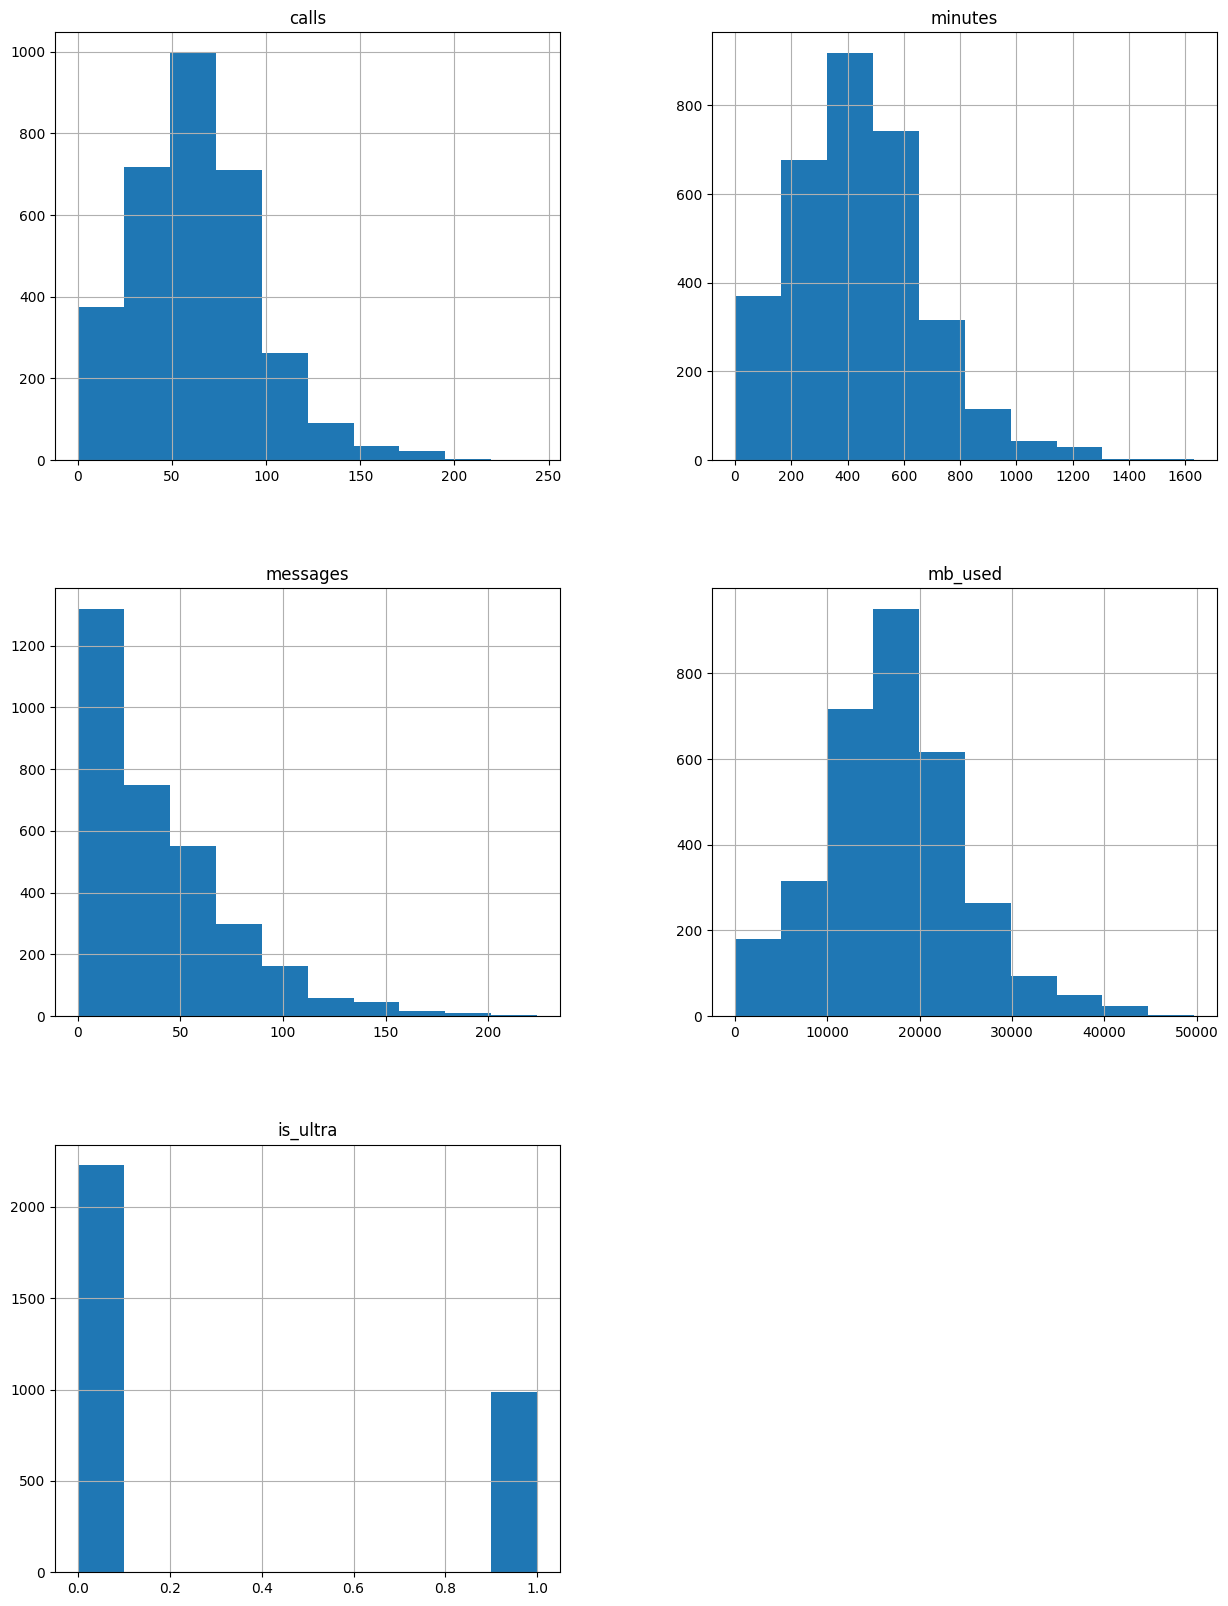

In [7]:
data.hist(figsize=(15,20));

Можно видеть, что среди пользователей, перешедших на один из новых тарифов, тариф "Смарт" выбирали более чем в два раза чаще, чем тариф ультра.

Проверим, как различается поведение пользователей, выбравших тарифы "Смарт" и "Ультра".

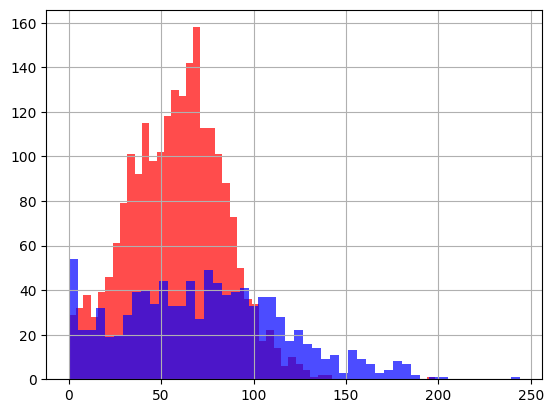

In [8]:
data[data['is_ultra'] == 0]['calls'].hist(bins=50, alpha=0.7, color='red');
data[data['is_ultra'] == 1]['calls'].hist(bins=50, alpha=0.7, color='blue');

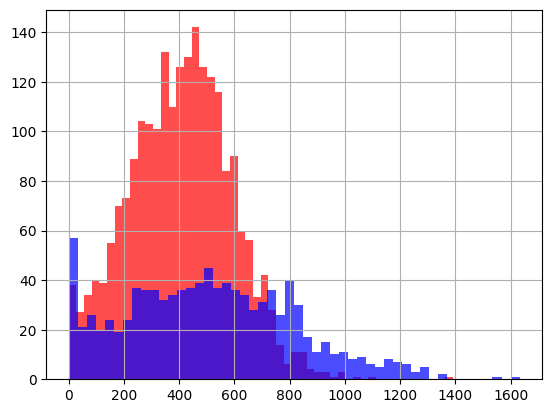

In [9]:
data[data['is_ultra'] == 0]['minutes'].hist(bins=50, alpha=0.7, color='red');
data[data['is_ultra'] == 1]['minutes'].hist(bins=50, alpha=0.7, color='blue');

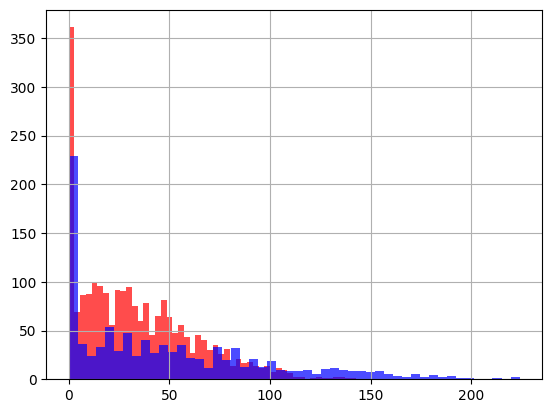

In [10]:
data[data['is_ultra'] == 0]['messages'].hist(bins=50, alpha=0.7, color='red');
data[data['is_ultra'] == 1]['messages'].hist(bins=50, alpha=0.7, color='blue');

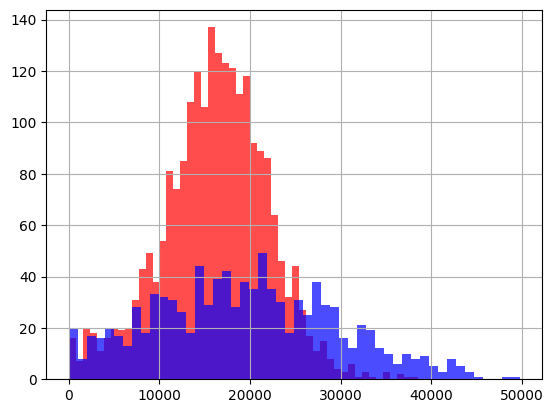

In [11]:
data[data['is_ultra'] == 0]['mb_used'].hist(bins=50, alpha=0.7, color='red');
data[data['is_ultra'] == 1]['mb_used'].hist(bins=50, alpha=0.7, color='blue');

In [12]:
data.pivot_table(index='is_ultra', values=['calls', 'minutes', 'messages', 'mb_used'], aggfunc=['mean','median', 'sum'])

mean                                      median            \
              calls       mb_used   messages     minutes  calls   mb_used   
is_ultra                                                                    
0         58.463437  16208.466949  33.384029  405.942952     60  16506.93   
1         73.392893  19468.823228  49.363452  511.224569     74  19308.01   

                              sum                                   
         messages minutes   calls      mb_used messages    minutes  
is_ultra                                                            
0              28  410.56  130315  36128672.83    74413  904846.84  
1              38  502.55   72292  19176790.88    48623  503556.20

In [13]:
display(data[data['is_ultra'] == 0].describe())
data[data['is_ultra'] == 1].describe()

calls      minutes     messages       mb_used  is_ultra
count  2229.000000  2229.000000  2229.000000   2229.000000    2229.0
mean     58.463437   405.942952    33.384029  16208.466949       0.0
std      25.939858   184.512604    28.227876   5870.498853       0.0
min       0.000000     0.000000     0.000000      0.000000       0.0
25%      40.000000   274.230000    10.000000  12643.050000       0.0
50%      60.000000   410.560000    28.000000  16506.930000       0.0
75%      76.000000   529.510000    51.000000  20043.060000       0.0
max     198.000000  1390.220000   143.000000  38552.620000       0.0

calls      minutes    messages       mb_used  is_ultra
count  985.000000   985.000000  985.000000    985.000000     985.0
mean    73.392893   511.224569   49.363452  19468.823228       1.0
std     43.916853   308.031100   47.804457  10087.178654       0.0
min      0.000000     0.000000    0.000000      0.000000       1.0
25%     41.000000   276.030000    6.000000  11770.280000       1.0
50%     74.000000   502.550000   38.000000  19308.010000       1.0
75%    104.000000   730.050000   79.000000  26837.720000       1.0
max    244.000000  1632.060000  224.000000  49745.730000       1.0

**Вывод:**
1) Более популярный тариф – "Smart". Его выбрают более чем в два раза чаще.

2) Можно предположить, что поведение пользователей тарифов различается. Пользователи тарифа "Ultra" больше пользуются всеми видами услуг (больше пользуются мобильной связью, отправляют больше сообщений и расходуют больше мегабайт при использовании мобильного интернета.

## Разделим исходные данные на обучающую, валидационную и тестовую выборки

Поскольку срятанной тестовой выборки нет, данные нужно разбить на три части: обучающую, валидационную и тестовую выборки в соотношении 3:1:1. Выполним разбивку в два шага: сначала разделим данные на обучающие и валидационные/тестовые в соотношении на 3:2, затем разделим валидационные/тестовые данные в на валидационную и тестовую выборки в соотношении 1:1.

In [14]:
data_train, data_valid_test = train_test_split(data, test_size=0.4, random_state=12345)
data_valid, data_test = train_test_split(data_valid_test, test_size=0.5, random_state=12345)

# Проверим размер выборок и их долю в исходной выборке
print(f"Размер обучающей выборки: {data_train.shape[0]}, доля в исходной выборке: {data_train.shape[0]/data.shape[0]:.1f}")
print(f"Размер валидационной выборки: {data_valid.shape[0]}, доля в исходной выборке: {data_valid.shape[0]/data.shape[0]:.1f}")
print(f"Размер тестовой выборки: {data_test.shape[0]}, доля в исходной выборке: {data_test.shape[0]/data.shape[0]:.1f}")

Размер обучающей выборки: 1928, доля в исходной выборке: 0.6
Размер валидационной выборки: 643, доля в исходной выборке: 0.2
Размер тестовой выборки: 643, доля в исходной выборке: 0.2


Данные разделены в соотношении 60%/20%/20%, то есть 3:1:1.

Целевой признак – значение в столбце `'is_ultra'`. Cоздадим переменные для признаков и целевого признака в обучающей и валидационной выборках

In [15]:
features_train = data_train.drop(['is_ultra'], axis=1)
target_train = data_train['is_ultra']
features_valid = data_valid.drop(['is_ultra'], axis=1)
target_valid = data_valid['is_ultra']

# выведем на экран размеры таблиц, которые хранятся в переменных
print(features_train.shape)
print(target_train.shape)
print(features_valid.shape)
print(target_valid.shape)

(1928, 4)
(1928,)
(643, 4)
(643,)


## Исследование качества разных моделей и выбор наилучшей

Целевой признак `'is_ultra'` является категориальным (признак принимает одно из двух значений: 1 или 0), поэтому можно сделать вывод, что перед нами стоит задача (бинарной) классификации. На данный момент нам известны три модели, используемые для решения задачи классификации: **дерево решений**, **случайный лес** и **логистическая регрессия**. Исследуем качество моделей применительно к нашему набору данных и выберем наилучшую.

### Дерево решений

Параметры дерева решений (из документации библиотеки scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html):

       DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, 
                           min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                           max_features=None, random_state=None, max_leaf_nodes=None, 
                           min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

Попробуем менять значения следующих гиперпараметров для получения лучшей модели (описание см. https://www.kaggle.com/code/zohrab/rus-sklearn-decisiontreeclassifier-hyperparams/notebook):
* `criterion` ('gini', 'enthropy') – функция для измерения качества разбиения. Поддерживаются критерии 'gini' для неодородности Джини и 'entropy' для прироста информации.
* `max_depth` - максимальная глубина дерева
* `min_samples_split` - миниальное количество экземпляров, которое может содержаться в узле для его дальнейшего разбиения.
* `min_samples_leaf` - миниальное количество экземпляров, которое может содержаться в листе.
* `max_leaf_nodes` - максимальное количество листьев. 

*1. Попробуем для начала построить модель дерева решений с дефолтными значениями гиперпараметров*

Accuracy дефолтной модели: 0.713841368584759


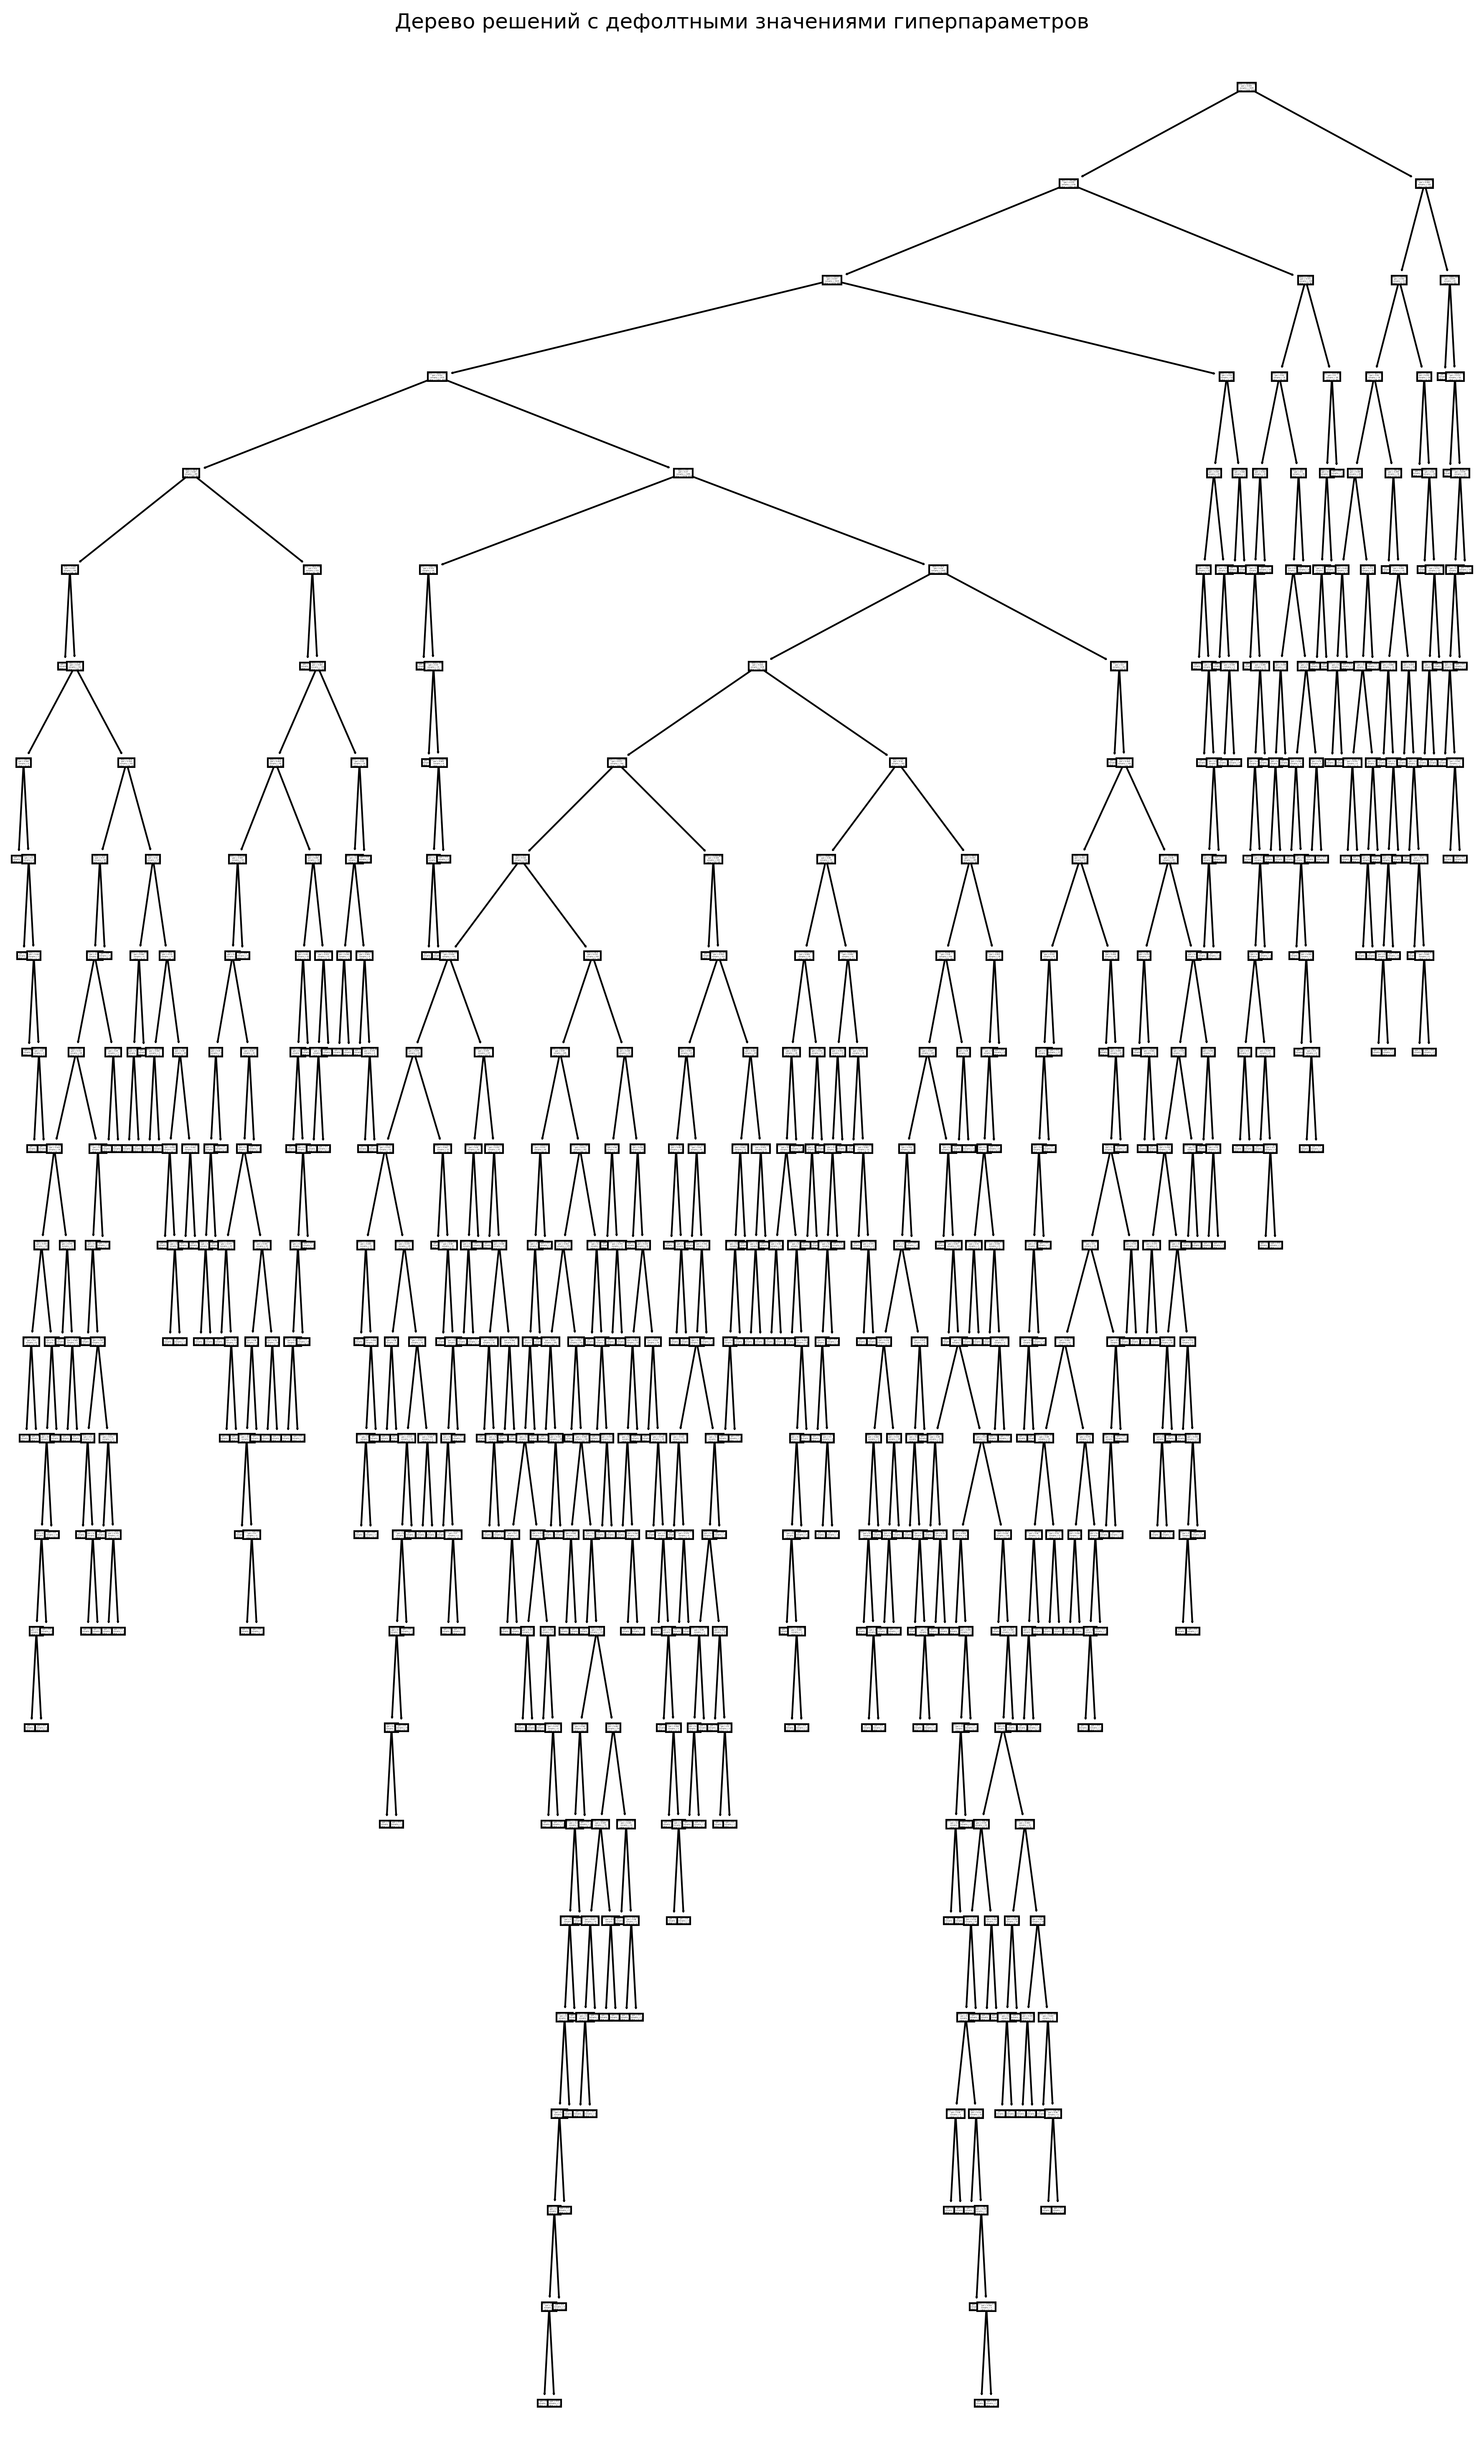

In [16]:
dt_clf = DecisionTreeClassifier(random_state=12345)
model_dt_default = dt_clf.fit(features_train, target_train)
dt_default_predictions_valid = model_dt_default.predict(features_valid)
result_dt_default = accuracy_score(target_valid, dt_default_predictions_valid)
print("Accuracy дефолтной модели:", result_dt_default) 

fig, axes = plt.subplots(figsize=(15,25), dpi=300)
plot_tree(model_dt_default)
plt.title("Дерево решений с дефолтными значениями гиперпараметров")
plt.show()

`Accuracy` модели со зачениями гиперпараметров по умолчанию ниже требуемого порогового дначения 0.75. К тому же дерево слишком глубокое (это может говорить о переобучении). 

*2. Один из наиболее важных гиперпараметров в решающем дереве - максимальная глубина. Попробуем подобрать лучшее значение для этого гиперпараметра.*

Можно осуществить перебор значений гиперпараметра `max_depth` циклом.

Accuracy наилучшей модели на валидационной выборке: 0.7853810264385692
max_depth наилучшей модели: 3


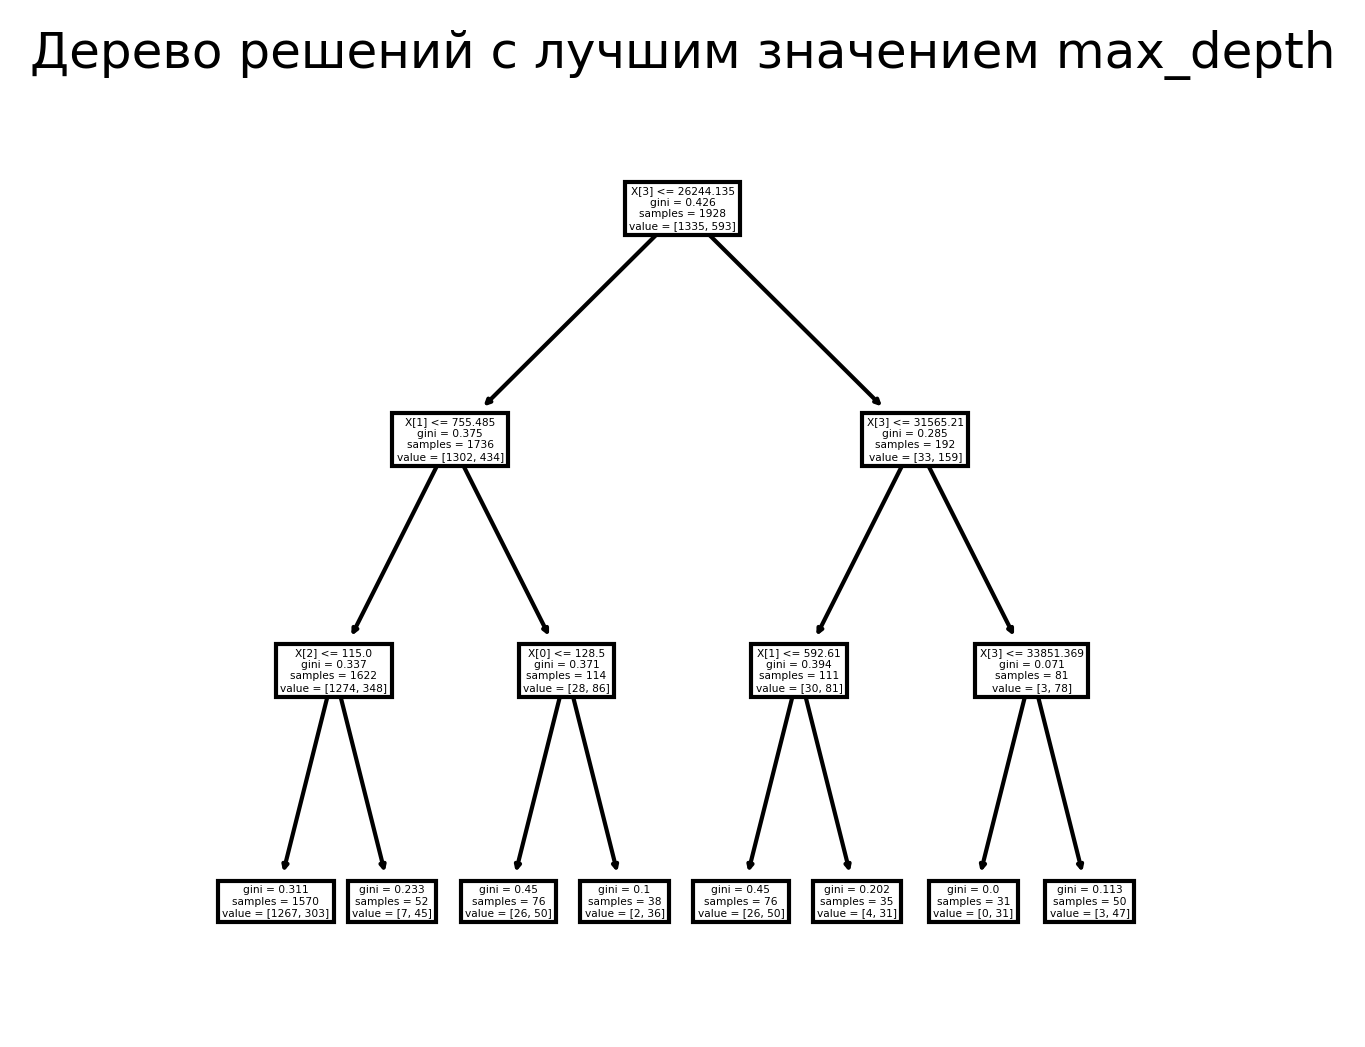

In [17]:
best_model_dt_depth = None
best_result_dt_depth = 0
for depth in range(1,11):
    model_dt_depth = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_dt_depth.fit(features_train, target_train)
    predictions_valid = model_dt_depth.predict(features_valid)
    result_dt_depth = accuracy_score(target_valid, predictions_valid)
    if result_dt_depth > best_result_dt_depth:
        best_model_dt_depth = model_dt_depth
        best_result_dt_depth = result_dt_depth
        best_depth = depth

print("Accuracy наилучшей модели на валидационной выборке:", best_result_dt_depth)
print("max_depth наилучшей модели:", best_depth)

fig, axes = plt.subplots(figsize=(4,4), dpi=300)
plot_tree(best_model_dt_depth)
plt.title("Дерево решений с лучшим значением max_depth")
plt.show()

*3. Попробуем улучшить значение `accuracy`, меняя значение нескольких гиперпараметров в цикле.*

In [18]:
best_model_dt = None
best_result_dt = 0
for criterion in ['gini', 'entropy']:
    for depth in range(1, 11):
        for samples_split in range(2, 5):
            for samples_leaf in range(1, 5):
                for leaf_nodes in range(2, 30):
                    model_dt = DecisionTreeClassifier(criterion=criterion,random_state=12345, max_depth=depth,
                                              min_samples_split=samples_split, min_samples_leaf=samples_leaf,
                                                 max_leaf_nodes=leaf_nodes)
                    model_dt.fit(features_train, target_train)
                    predictions_valid = model_dt.predict(features_valid)
                    result_dt = accuracy_score(target_valid, predictions_valid)
                    if result_dt > best_result_dt:
                        best_model_dt = model_dt
                        best_result_dt = result_dt
                        best_depth = depth
                        best_criterion = criterion
                        best_samples_split = samples_split
                        best_samples_leaf=samples_leaf
                        best_leaf_nodes=leaf_nodes

print("Значение accuracy наилучшей модели на валидационной выборке:", best_result_dt)
print("criterion:", best_criterion)
print("max_depth:", best_depth)
print("min_samples_split:", best_samples_split)
print("min_samples_leaf:", best_samples_leaf)
print("max_leaf_nodes:", best_leaf_nodes)

fig, axes = plt.subplots(figsize=(20,15), dpi=1000)
plot_tree(best_model_dt)
plt.title("Дерево решений с лучшим значением accuracy")
plt.show()

Значение accuracy наилучшей модели на валидационной выборке: 0.7916018662519441
criterion: entropy
max_depth: 6
min_samples_split: 2
min_samples_leaf: 2
max_leaf_nodes: 20


*3. Попробуем определить лучшие значения гиперпараметров, используя GridSearchCV (эксперимент)*

In [19]:
# dt_clf = DecisionTreeClassifier(random_state=12345)
parametrs = {'criterion': ['gini', 'entropy'],
              'max_depth': range(1, 11),
              'min_samples_split': range(2, 5),
              'min_samples_leaf': range(1, 5),
              'max_leaf_nodes': range(2, 30)}
grid_dt = GridSearchCV(dt_clf, parametrs, cv=3)
grid_dt.fit(features_train, target_train)
best_model_dt_grid = grid_dt.best_estimator_
print("Лучшее значение accuracy на обучающей выборке", grid_dt.best_score_)
grid_dt.best_params_

Лучшее значение accuracy на обучающей выборке 0.8195035924865434


{'criterion': 'gini',
 'max_depth': 9,
 'max_leaf_nodes': 14,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

Лучшее значение accuracy на валидационной выборке 0.7869362363919129


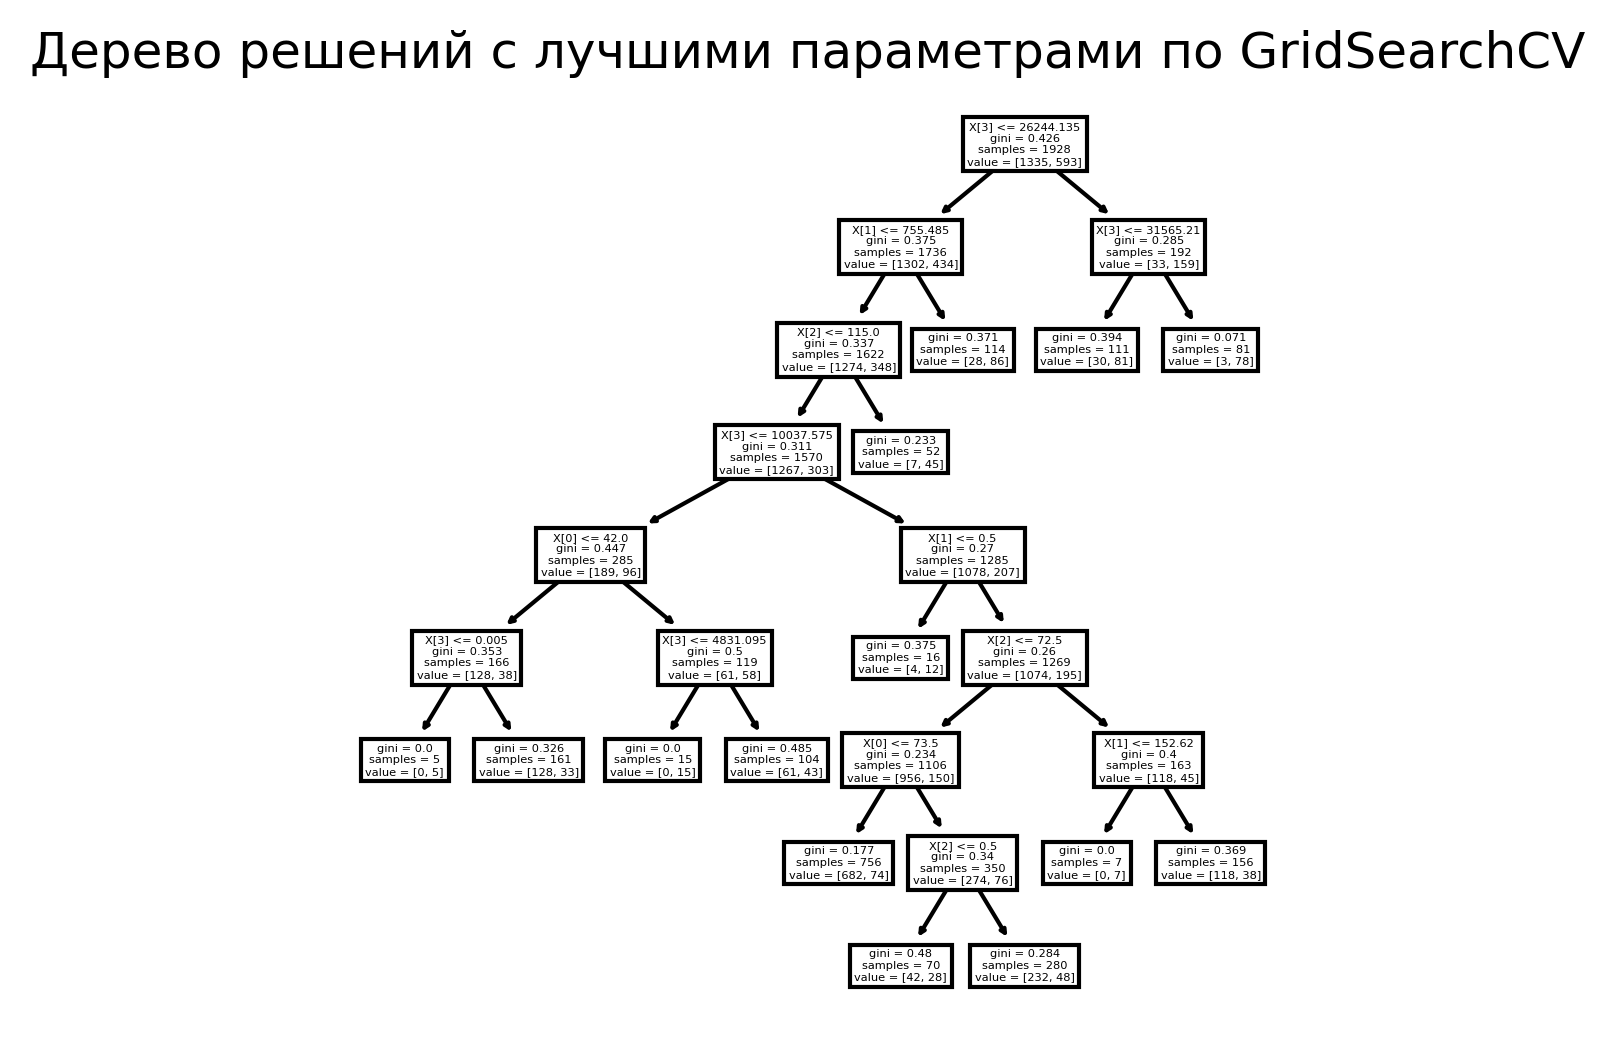

In [20]:
print("Лучшее значение accuracy на валидационной выборке", best_model_dt_grid.score(features_valid, target_valid))

fig, axes = plt.subplots(figsize=(4,4), dpi=300)
plot_tree(best_model_dt_grid)
plt.title("Дерево решений с лучшими параметрами по GridSearchCV")
plt.show()

**Лучший результат для случайного дерева**

Модель решающего дерева показывает лучшее значение `accuracy` на валидационной выборке - 0.79 – при следующих значениях гиперпараметров: 
* `criterion`: entropy,
* `max_depth`: 6,
* `min_samples_split`: 2,
* `min_samples_leaf`: 2,
* `max_leaf_nodes`: 20. 

В то же время при изменении только `max_depth` (`max_depth`: 3), значение `accuracy` оказывается незначительно ниже.

### Случайный лес

Параметры случайного леса (из документации библиотеки scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html):

       RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2,
                              min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', 
                              max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False,
                              n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None,
                              ccp_alpha=0.0, max_samples=None)

Попробуем менять значения следующих гиперпараметров для получения лучшей модели (те же, что и для дерева решений, с добавлением количества деревьев):
* `n_estimators` – число деревьев в лесу. 
* `criterion` ('gini', 'enthropy') – функция для измерения качества разбиения. Поддерживаются критерии 'gini' для неодородности Джини и 'entropy' для прироста информации.
* `max_depth` - максимальная глубина дерева
* `min_samples_split` - миниальное количество экземпляров, которое может содержаться в узле для его дальнейшего разбиения.
* `min_samples_leaf` - миниальное количество экземпляров, которое может содержаться в листе.
* `max_leaf_nodes` - максимальное количество листьев.

*1. Как и в случае с решающим деревом, посмотрим сначала на модель со значениями гиперпараметров по умолчанию, чтобы понять как меняется значение `accuracy` при их изменении.*

In [21]:
rf_clf = RandomForestClassifier(random_state=12345)
model_rf_default = rf_clf.fit(features_train, target_train)
print('Accuracy дефолтной модели:', model_rf_default.score(features_valid, target_valid))

Accuracy дефолтной модели: 0.7853810264385692


Значение `accuracy` модели случайного леса уже удовлетворяет условию (больше 0.75). Попробуем улучшить значение `accuracy`, меняя значения гиперпараметров.

*2. В первую очередь, попробуем поэкспериментировать с количеством деревьев.*

In [22]:
best_model_rf_est = None
best_result_rf_est = 0
for est in range(1, 50): 
    model_rf_est = RandomForestClassifier(random_state=12345, n_estimators=est)
    model_rf_est.fit(features_train, target_train)
    result_rf_est = model_rf_est.score(features_valid, target_valid)  
    if result_rf_est > best_result_rf_est:
        best_model_rf_est = model_rf_est
        best_result_rf_est = result_rf_est
        best_est = est
        
print("Accuracy модели на валидационной выборке:", best_result_rf_est)
print("Число деревьев в наилучшей модели:", best_est)

Accuracy модели на валидационной выборке: 0.7947122861586314
Число деревьев в наилучшей модели: 23


Значение `accuracy` повысилось, попробуем его еще улучшить.

*2. Попробуем поменять количество и глубину деревьев.*

In [23]:
best_model_rf_est_dep = None
best_result_rf_est_dep = 0
for est in range(1, 51): 
    for depth in range(1, 11):
        model_rf_est_dep = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_rf_est_dep.fit(features_train, target_train)
        result_rf_est_dep = model_rf_est_dep.score(features_valid, target_valid)  
        if result_rf_est_dep > best_result_rf_est_dep:
            best_model_rf_est_dep = model_rf_est_dep
            best_result_rf_est_dep = result_rf_est_dep
            best_est = est
            best_depth = depth
        
print("Accuracy модели на валидационной выборке:", best_result_rf_est_dep)
print("Число деревьев в наилучшей модели:", best_est)
print("max_depth наилучшей модели:", best_depth)

Accuracy модели на валидационной выборке: 0.8087091757387247
Число деревьев в наилучшей модели: 40
max_depth наилучшей модели: 8


Значение `accuracy` еще немного улучшилось.

*3. Попробуем улучшить значение `accuracy`, меняя значение нескольких гиперпараметров в цикле.*

In [24]:
best_model_rf = None
best_result_rf = 0
for est in range(1, 50):
    for depth in range(1, 11):
        for samples_split in range(2, 5):
            for samples_leaf in range(1, 5):
                model_rf = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, 
                                                  min_samples_split=samples_split, min_samples_leaf=samples_leaf)
                model_rf.fit(features_train, target_train)
                result_rf = model_rf.score(features_valid, target_valid)  
                if result_rf > best_result_rf:
                    best_model_rf = model_rf
                    best_result_rf = result_rf
                    best_est = est
                    best_depth = depth
                    best_samples_split = samples_split
                    best_samples_leaf=samples_leaf
                    best_leaf_nodes=leaf_nodes


        
print("Accuracy наилучшей модели на валидационной выборке:", best_result_rf)
print("Число деревьев в наилучшей модели:", best_est)
print("max_depth:", best_depth)
print("min_samples_split:", best_samples_split)
print("min_samples_leaf:", best_samples_leaf)

Accuracy наилучшей модели на валидационной выборке: 0.8118195956454122
Число деревьев в наилучшей модели: 44
max_depth: 7
min_samples_split: 3
min_samples_leaf: 1


*4. Попробуем определить лучшие значения гиперпараметров, используя GridSearchCV (эксперимент)*

In [25]:
# rf_clf = RandomForestClassifier(random_state=12345)
parametrs_rf = {'n_estimators': range(1, 50),
              'max_depth': range(1, 11),
              'min_samples_split': range(2, 5),
              'min_samples_leaf': range(1, 5)}
grid_rf = GridSearchCV(dt_clf, parametrs, cv=3)
grid_rf.fit(features_train, target_train)
best_model_rf_grid = grid_rf.best_estimator_
print("Лучшее значение accuracy на обучающей выборке:", grid_rf.best_score_)
print(grid_rf.best_params_)
print("Лучшее значение accuracy на валидационной выборке:", best_model_rf_grid.score(features_valid, target_valid))

Лучшее значение accuracy на обучающей выборке: 0.8195035924865434
{'criterion': 'gini', 'max_depth': 9, 'max_leaf_nodes': 14, 'min_samples_leaf': 4, 'min_samples_split': 2}
Лучшее значение accuracy на валидационной выборке: 0.7869362363919129


**Лучший результат для случайного леса**

Модель случайного леса показывает лучшее значение `accuracy` на валидационной выборке - 0.81 – при следующих значениях гиперпараметров: 

* `n_estimators`: 44
* `max_depth`: 7
* `min_samples_split`: 3
* `min_samples_leaf`: 1

### Логистическая регрессия

Параметры логистической регрессии (из документации библиотеки scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html):
    
    LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
                     intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, 
                     multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)


*1. Посмотрим сначала на модель со значениями гиперпараметров по умолчанию, чтобы понять как меняется значение `accuracy` при их изменении.*

In [26]:
model_lr = LogisticRegression(random_state=12345)
model_lr_default = model_lr.fit(features_train, target_train)
print('Accuracy дефолтной модели:', model_lr_default.score(features_valid, target_valid))

Accuracy дефолтной модели: 0.7107309486780715


*2. Попробуем поменять значения гиперпараметров в цикле.*

In [27]:
best_model_lr = None
best_result_lr = 0
for it in range(100, 10000, 100):
    for solver in ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']:
        model_lr = LogisticRegression(random_state=12345, max_iter=it, solver=solver)
        model_lr.fit(features_train, target_train)
        result_lr = model_lr.score(features_valid, target_valid)  
        if result_lr > best_result_lr:
            best_model_lr = model_lr
            best_result_lr = result_lr
            best_max_iter = it
            best_solver = solver       
                   
        
print("Accuracy модели на валидационной выборке:", best_result_lr)
print("max_iter наилучшей модели:", best_max_iter)
print("solver наилучшей модели:", solver)                   

Accuracy модели на валидационной выборке: 0.7589424572317263
max_iter наилучшей модели: 100
solver наилучшей модели: saga


**Лучший результат для логистической регрессии**

Путем изменения значения гиперпараметра `solver` удается улучшить значение `accuracy` модели логистической регрессии выше порогового значения 0.75.

**Вывод:** при помощи всех трех моделей (дерево решений, случайный лес, логистическая регрессия) удается получить значение `accuracy` больше 0.75, однако лучший результат показывает на валидационной выборке показывает модель случайного леса.

## Проверка качества модели на тестовой выборке

Лучшее значение `accuracy` на валидационной выборке установлено для случайного леса с количеством деревьев 40 и глубиной 8. Проверим качество модели с данными гиперпараметрами на тестовой выборке.

In [28]:
best_model_rf

RandomForestClassifier(max_depth=7, min_samples_split=3, n_estimators=44,
                       random_state=12345)

Переменные для признаков и целевого признака в тестовой выборке:

In [29]:
features_test = data_test.drop(['is_ultra'], axis=1)
target_test = data_test['is_ultra']

In [30]:
best_model_rf.score(features_test, target_test)  

0.7962674961119751

**Вывод:** значение `accuracy` лучшей модели на тестовой выборке составляет около 0.80.

## **Дополнительно: проверка модели на вменяемость*

Соотношение количества клиентов, выбравших тариф "Ультра" (1) и "Смарт" (0).

<AxesSubplot:ylabel='clients_ratio'>

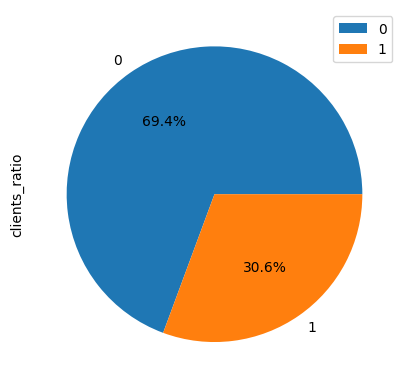

In [31]:
is_ultra_pivot = data.pivot_table(index='is_ultra', 
                                  values='calls',
                                  aggfunc='count')
is_ultra_pivot.columns=['clients_ratio']
is_ultra_pivot.plot(kind='pie', y='clients_ratio', autopct='%1.1f%%')

Сравним результаты для лучшей модели с со значением `accuracy` для константной модели, то есть модели, которая для любого объекта прогнозирует одинаковое значение целевого признака (`'is_ultra'` = 0).

In [32]:
target_pred_constant = pd.Series(0, index=target_valid.index)
accuracy_score(target_valid, target_pred_constant)

0.7060653188180405

Значение `accuracy` константной модели приблизительно соответсствует доле клиентов, выбравших тариф "Смарт" ('is_ultra' = 0).

**Вывод:** значение `accuracy` модели случайного леса выше, чем у константной модели, поэтому модель можно считать вменяемой.

## Итоги

На основании данных о поведении клиентов "Мегалайн", которые перешли на новые тарифы, была построена модель, которая предложит пользователям подходящий новый тариф («Смарт» или «Ультра»). В ходе работы были выполнены следующие действия:

* загружены и изучены данные;
* исходные данные разделены на выборки (обучающую, валидационную и тестовую);
* исследовано качество разных моделей, выбрана наилучшая модель;
* качество лучшей модели проверено на тестовой выборке;
* модель проверена на вменяемость.

**Общий вывод**: 
Наилучший результат показывала модель случайного леса (`max_depth`=7, `min_samples_split`=3, `n_estimators`=44) со значением значение `accuracy` на тестовой выборке около 0.80. Модель прошла проверку на вменяемость.